## Quantum Phase Estimation (QPE)
Quantum Phase Estimation (QPE) is a quantum algorithm that estimates the phase '𝜃' of an eigenvalue of a unitary operator, using a quantum register and controlled operations. It leverages quantum parallelism and the Quantum Fourier Transform (QFT) to efficiently extract phase information with high precision.

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.6 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=76ab158bd217b588037274124236cb0bd7956d3d4cf16d26c7715417c5d2501f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define parameters
theta = 0.25  # Phase we want to estimate
n_qubits = 3  # Number of qubits in the phase estimation register

# Create the quantum circuit
qp = QuantumCircuit(n_qubits + 1, n_qubits)  # Last qubit is for the eigenstate

# Step 1: Initialize the eigenstate in |1>
qp.x(n_qubits)

# Step 2: Apply Hadamard gates to phase estimation qubits
qp.h(range(n_qubits))

# Step 3: Apply controlled unitary operations
for qubit in range(n_qubits):
    qp.cp(2 * np.pi * theta * (2 ** qubit), qubit, n_qubits)

# Step 4: Apply the Quantum Fourier Transform (inverse)
for qubit in range(n_qubits // 2):
    qp.swap(qubit, n_qubits - qubit - 1)
for j in range(n_qubits):
    for k in range(j):
        qp.cp(-np.pi / (2 ** (j - k)), k, j)
    qp.h(j)

# Step 5: Measure the phase estimation qubits
qp.measure(range(n_qubits), range(n_qubits))

# Run the circuit on a simulator and get the results
simulator = AerSimulator()
compiled_circuit = transpile(qp, simulator)
result = simulator.run(compiled_circuit).result()

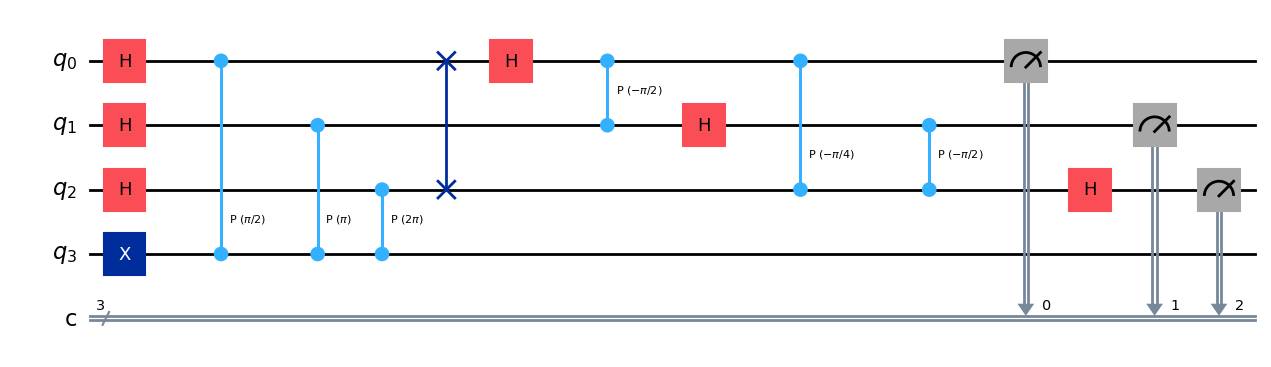

In [ ]:
#Visualise the circuit
qp.draw('mpl')

Counts: {'010': 1024}


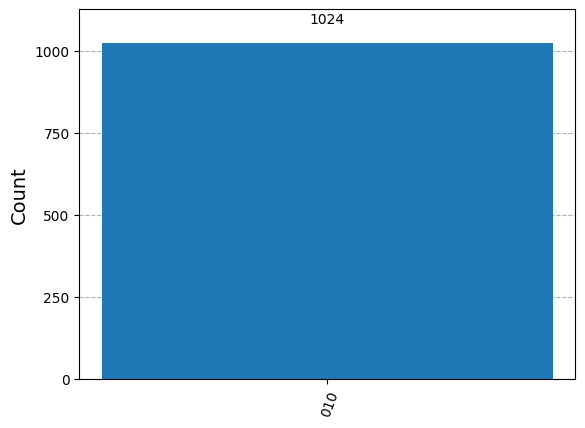

In [ ]:
#Print the count
counts3 = result.get_counts(qp)
print("Counts:", counts3)

# Plot the results
plot_histogram(counts3)